In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#import the dataset
df=pd.read_csv(r"C:\Users\Abel\Downloads\Elon_musk.csv",error_bad_lines=False)

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
#strip the trailings 
elon= [Text.strip() for Text in df.Text]
elon[0:5]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [5]:
#join the sentences
sentences1 = ' '.join(elon)
sentences1

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [6]:
#removing the punctuation marks
no_punc_elon_text = sentences1.translate(str.maketrans('', '', string.punctuation))
no_punc_elon_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [7]:
#removing special type of characters

no_punc_elon_text1 = "".join(u for u in no_punc_elon_text if u not in ("�",'\n'))

print(no_punc_elon_text1)

kunalb11 Im an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdogeAll thought he would failHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg Any cr

In [8]:
#removing trailers
no_punc_elon_text2=no_punc_elon_text1.strip() 
no_punc_elon_text2

'kunalb11 Im an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdogeAll thought he would failHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg Any c

In [9]:
#removing numbers
import re
no_punc_elon_text3= re.sub("[0-9" "]+"," ",no_punc_elon_text2)
no_punc_elon_text3

'kunalb  Im an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera  Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco WFKMYu oj Frodo was the underdogeAll thought he would failHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx  Haha thanks  flcnhvy anonyx  Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco rWE uHSTS geoffkeighley UnrealEngine Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U F U F  This is true power haha httpstcoFc uhQSd O freewalletorg Any crypto wallet t

In [10]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_elon_text3)
print(text_tokens)


['kunalb', 'Im', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco', 'WFKMYu', 'oj', 'Frodo', 'was', 'the', 'underdogeAll', 'thought', 'he', 'would', 'failHimself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx', 'Haha', 'thanks', 'flcnhvy', 'anonyx', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco', 'rWE', 'uHSTS', 'geoffkeighley', 'UnrealEngine', 'Its', 'gettin

In [11]:
#dataframe of the tokenized word
sent_df = pd.DataFrame(text_tokens, columns=['words'])
sent_df.head(20)

,words
0,kunalb
1,Im
2,an
3,alien
4,IDAACarmack
5,Ray
6,tracing
7,on
8,Cyberpunk
9,with


In [48]:
#removing the stopwords
from nltk.corpus import stopwords
en_stops = list(stopwords.words('english'))
en_stops.append('I')
en_stops.append('U')
en_stops.append('F')
en_stops.append('RT')
en_stops.append('X')
en_stops.append('u')
en_stops.append('is')
en_stops.append('tri')
en_stops.append('ppathol')
en_stops.append('thi')
en_stops.append('f')
en_stops.append('httpstco')

en_stops.append('amp')

st_p=[word for word in sent_df['words'] if not word in en_stops]
en_stops


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
#Noramalize the data
lower_words = [x.lower() for x in st_p ]
print(lower_words[0:25])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next']


In [50]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'wfkmyu', 'oj', 'frodo', 'underdog', 'thought', 'would', 'failhimself', 'httpstcozgxjfdzzrm', 'owenspark', 'anonyx']


In [51]:
#dataframe
sent_df=pd.DataFrame(stemmed_tokens,columns=['words'])
sent_df

,words
0,kunalb
1,im
2,alien
3,idaacarmack
4,ray
...,...
14368,dumb
14369,dumber
14370,progress
14371,updat


In [52]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [53]:
string_Total = " ".join(sent_df["words"])

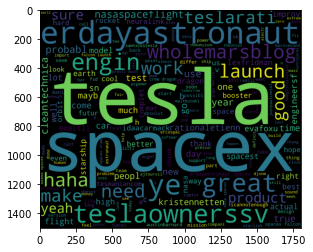

In [54]:
wordcloud_stw = WordCloud(width = 1800,height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw)

In [19]:
#import affin lexicon
afinn = pd.read_csv('E:/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [20]:
#defining the custom function
from itertools import islice

def take(n, iterable):
    return list(islice(iterable, n))

In [21]:
#setting the affin_scores
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [22]:
#defining the custom function for the text
nlp = spacy.load('en_core_web_sm')
def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores .get(word.lemma_, 0)
    return sent_score

In [23]:
#checking affin lexicon
calculate_sentiment(text = 'i am delighted')

3

In [24]:
#checking the sentiment scores of the text words
sent_df['sentiment_value'] = sent_df['words'].apply(calculate_sentiment)
sent_df

,words,sentiment_value
0,kunalb,0
1,im,0
2,alien,0
3,idaacarmack,0
4,ray,0
...,...,...
15645,dumb,-3
15646,dumber,0
15647,progress,2
15648,updat,0


In [25]:
sent_df.head(20)

,words,sentiment_value
0,kunalb,0
1,im,0
2,alien,0
3,idaacarmack,0
4,ray,0
5,trace,0
6,cyberpunk,0
7,hdr,0
8,nextlevel,0
9,have,0


<AxesSubplot:xlabel='sentiment_value', ylabel='count'>

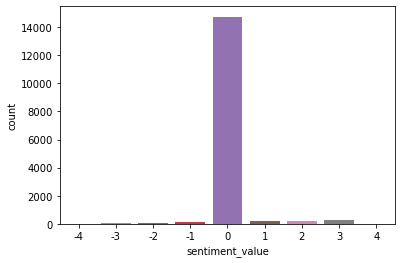

In [27]:
import seaborn as sns
sns.countplot(x=sent_df['sentiment_value'])

In [26]:
#overall average of the sentiment_scores
sent_df['sentiment_value'].mean()

0.06779552715654952

## By this we can conclude that the emotion is moreover neutral in entire text